<a href="https://colab.research.google.com/github/ShivaKrisl/EZTraining/blob/main/RNN_%26_LSTM_Hands_On_DSML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from pathlib import Path
np.random.seed(42)
tf.random.set_seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt

# Basic RNNs

## Generate the Dataset

In [ ]:
def generate_time_series(batch_size, n_steps): #To generate Time-Series Data
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [ ]:
np.random.seed(42)

n_steps = 50  #No of columns we need in time series data
series = generate_time_series(10000, n_steps + 1)   #no of rows are 10000
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
series.shape

(10000, 51, 1)

10000:No of Rows  50: No of columns(time stamps) and 1: Value to be predicted

In [ ]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

In [ ]:
X_valid.shape, X_test.shape

((2000, 50, 1), (1000, 50, 1))

### Representing 3 randomly selected data

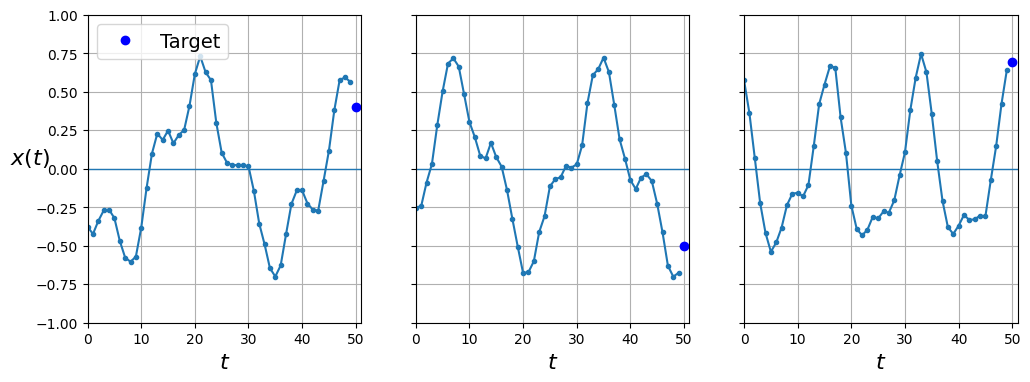

In [ ]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

## Using a Simple RNN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1]) #None represents sequence data shape is unknown
])

optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)  #MSE for Continuus data to be predicted
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 13s 37ms/step - loss: 0.4310 - val_loss: 0.2171
Epoch 2/20
219/219 [==============================] - 7s 32ms/step - loss: 0.1637 - val_loss: 0.1527
Epoch 3/20
219/219 [==============================] - 8s 35ms/step - loss: 0.1462 - val_loss: 0.1485
Epoch 4/20
219/219 [==============================] - 7s 31ms/step - loss: 0.1474 - val_loss: 0.1476
Epoch 5/20
219/219 [==============================] - 8s 39ms/step - loss: 0.1477 - val_loss: 0.1506
Epoch 6/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0997 - val_loss: 0.0613
Epoch 7/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0461 - val_loss: 0.0384
Epoch 8/20
219/219 [==============================] - 8s 37ms/step - loss: 0.0327 - val_loss: 0.0293
Epoch 9/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0263 - val_loss: 0.0241
Epoch 10/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0223 - val_l

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 6ms/step - loss: 0.0111


0.011087341234087944

In [ ]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

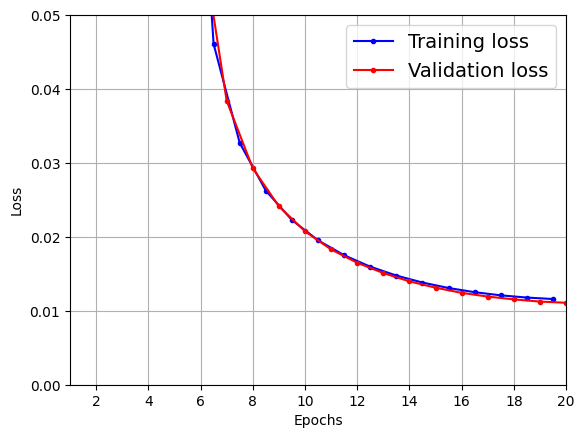

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 [==============================] - 0s 5ms/step


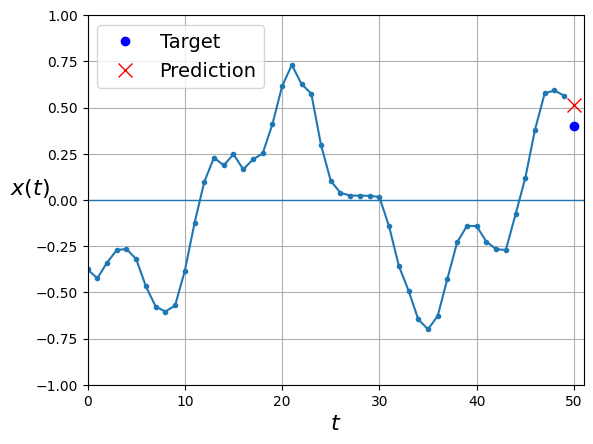

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

## LSTM

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.lasyers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layer.LSTM(20, return_sequences=True),
    keras.layers.LSTM(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 10s 15ms/step - loss: 0.0488 - val_loss: 0.0353
Epoch 2/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0229 - val_loss: 0.0194
Epoch 3/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0183 - val_loss: 0.0182
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0165 - val_loss: 0.0150
Epoch 5/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0135 - val_loss: 0.0105
Epoch 6/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0088 - val_loss: 0.0091
Epoch 7/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0059 - val_loss: 0.0053
Epoch 8/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 9/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 10/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0033 - val_l

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 5ms/step - loss: 0.0028


0.0028461299370974302

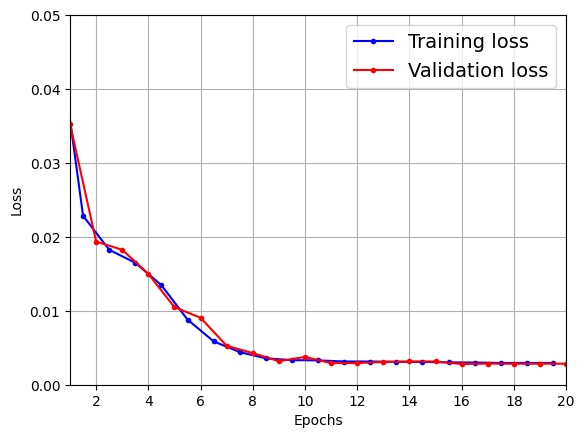

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 [==============================] - 1s 4ms/step


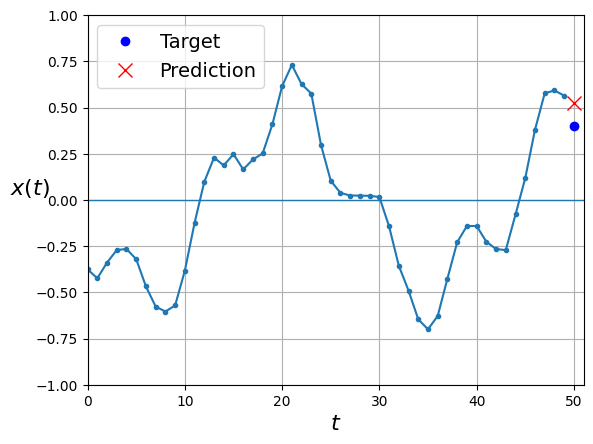

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()